# LOAN PREDICTION SYSTEM

In [1]:
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('loan_data_set.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.drop('Loan_ID', axis=1, inplace= True)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Univariate Analysis Of variable 'LoanAmount'

<AxesSubplot:>

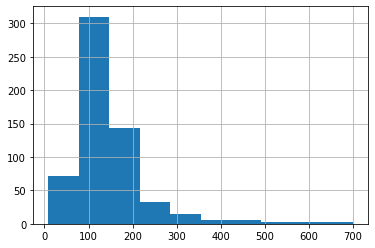

In [7]:
df['LoanAmount'].hist()

<AxesSubplot:xlabel='LoanAmount'>

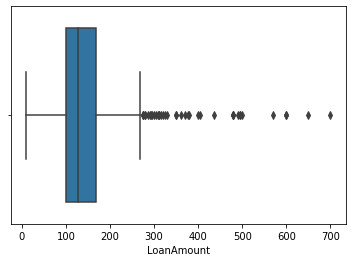

In [8]:
sns.boxplot(x=df['LoanAmount'])

In [9]:
dataset = df['LoanAmount']
def detect_outlier(data_1):
    count = 0
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            count = count+1
    return count
no_of_outliers = detect_outlier(dataset)
print("The percentage of outliers values in LoanAmount:",(no_of_outliers/df['LoanAmount'].isnull().count())*100,"%")

The percentage of outliers values in LoanAmount: 2.2801302931596092 %


In [10]:
#since no. of ouliers are very less its not necessary to remove them . Just by removing the skewness we can handle the outliers

In [11]:
df['LoanAmount'].skew()

2.677551679256059

In [12]:
print("The percentage of NaN values in LoanAmount:",(df['LoanAmount'].isnull().sum()/df['LoanAmount'].isnull().count())*100,"%")

The percentage of NaN values in LoanAmount: 3.5830618892508146 %


In [13]:
#removal of NaN values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

<AxesSubplot:xlabel='LoanAmount'>

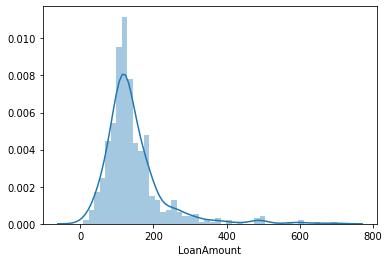

In [14]:
sns.distplot(df['LoanAmount'])

In [15]:
df['LoanAmount'].skew()

2.7454067641709576

In [16]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
print(df['LoanAmount_log'].skew())
df.drop('LoanAmount', axis=1, inplace= True)

-0.18122724931425552


<AxesSubplot:xlabel='LoanAmount_log'>

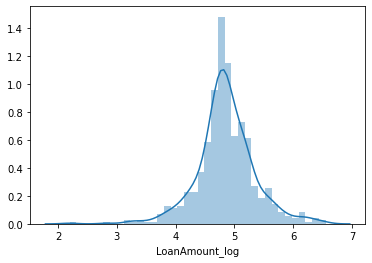

In [17]:
sns.distplot(df['LoanAmount_log'])

In [18]:
dataset = df['LoanAmount_log']
def detect_outlier(data_1):
    count = 0
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            count = count+1
    return count
no_of_outliers = detect_outlier(dataset)
print("The percentage of outliers values in LoanAmount_log:",(no_of_outliers/df['LoanAmount_log'].isnull().count())*100,"%")

The percentage of outliers values in LoanAmount_log: 1.6286644951140066 %


<AxesSubplot:>

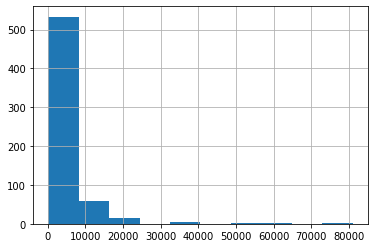

In [19]:
df['ApplicantIncome'].hist()

In [20]:
print("The percentage of NaN values in ApplicantIncome:",(df['ApplicantIncome'].isnull().sum()/df['ApplicantIncome'].isnull().count())*100,"%")

The percentage of NaN values in ApplicantIncome: 0.0 %


<AxesSubplot:xlabel='ApplicantIncome'>

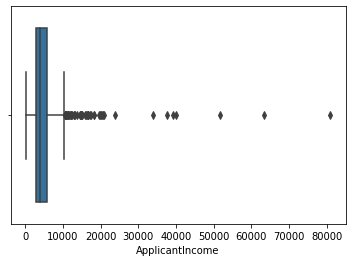

In [21]:
sns.boxplot(x=df['ApplicantIncome'])

<AxesSubplot:>

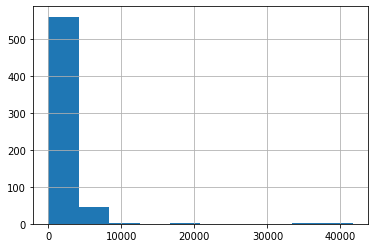

In [22]:
df['CoapplicantIncome'].hist()

In [23]:
print("The percentage of NaN values in CoapplicantIncome:",(df['CoapplicantIncome'].isnull().sum()/df['CoapplicantIncome'].isnull().count())*100,"%")

The percentage of NaN values in CoapplicantIncome: 0.0 %


<AxesSubplot:xlabel='CoapplicantIncome'>

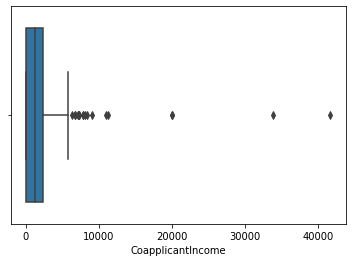

In [24]:
sns.boxplot(x=df['CoapplicantIncome'])

In [25]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:>

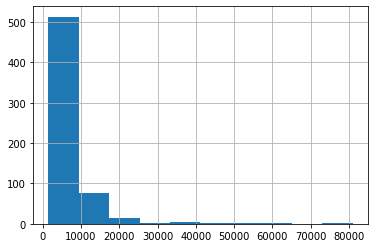

In [26]:
df['TotalIncome'].hist()

In [27]:
df['TotalIncome'].skew()

5.633448514884535

<AxesSubplot:xlabel='TotalIncome'>

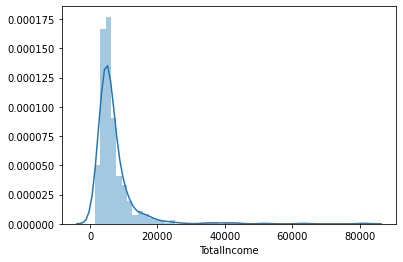

In [28]:
sns.distplot(df['TotalIncome'])

In [29]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])
print(df['TotalIncome_log'].skew())
df.drop('TotalIncome', axis=1, inplace= True)
df.drop('ApplicantIncome', axis=1, inplace= True)
df.drop('CoapplicantIncome', axis=1, inplace= True)

1.0767023443049968


<AxesSubplot:>

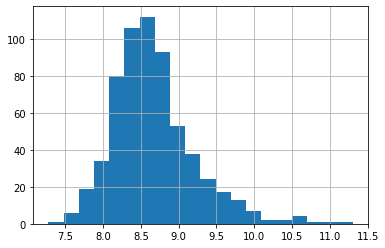

In [30]:
df['TotalIncome_log'].hist(bins=20)

In [31]:
#Univariate Analysis Of variable 'Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

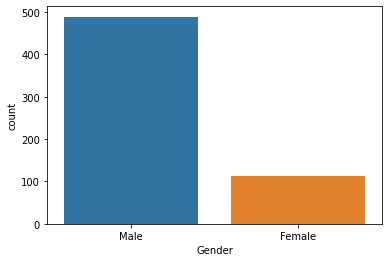

In [32]:
sns.countplot(df['Gender'])

In [33]:
print("The percentage of NaN values in Gender:",(df['Gender'].isnull().sum()/df['Gender'].isnull().count())*100,"%")

The percentage of NaN values in Gender: 2.1172638436482085 %


In [34]:
#removal of NaN values
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [35]:
#Univariate Analysis Of variable 'Married'

<AxesSubplot:xlabel='Married', ylabel='count'>

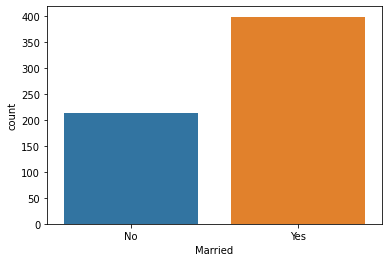

In [36]:
sns.countplot(df['Married'])

In [37]:
print("The percentage of NaN values in Married:",(df['Married'].isnull().sum()/df['Married'].isnull().count())*100,"%")

The percentage of NaN values in Married: 0.4885993485342019 %


In [38]:
#removal of NaN values
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [39]:
#Univariate Analysis Of variable 'Credit_History'

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

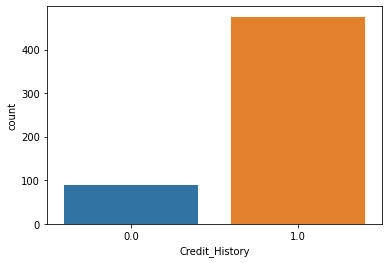

In [40]:
sns.countplot(df['Credit_History'])

In [41]:
print("The percentage of NaN values in Credit_History:",(df['Credit_History'].isnull().sum()/df['Credit_History'].isnull().count())*100,"%")

The percentage of NaN values in Credit_History: 8.143322475570033 %


In [42]:
#removal of NaN values
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [43]:
#Univariate Analysis Of variable 'Married'

<AxesSubplot:xlabel='Married', ylabel='count'>

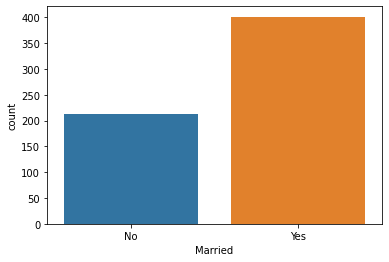

In [44]:
sns.countplot(df['Married'])

In [45]:
print("The percentage of NaN values in Credit_History:",(df['Credit_History'].isnull().sum()/df['Credit_History'].isnull().count())*100,"%")

The percentage of NaN values in Credit_History: 0.0 %


In [46]:
#Univariate Analysis Of variable 'Dependents'

<AxesSubplot:xlabel='Dependents', ylabel='count'>

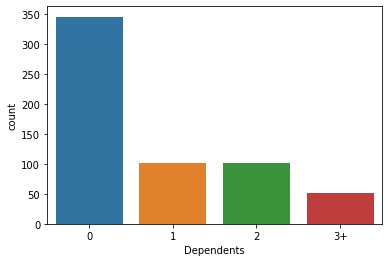

In [47]:
sns.countplot(df['Dependents'])

In [48]:
print("The percentage of NaN values in Dependents:",(df['Dependents'].isnull().sum()/df['Dependents'].isnull().count())*100,"%")

The percentage of NaN values in Dependents: 2.44299674267101 %


In [49]:
#removal of NaN values
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [50]:
#Univariate Analysis Of variable 'Self_Employed'

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

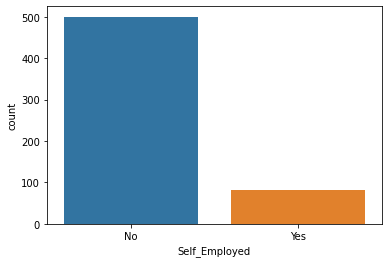

In [51]:
sns.countplot(df['Self_Employed'])

In [52]:
print("The percentage of NaN values in Self_Employed:",(df['Self_Employed'].isnull().sum()/df['Self_Employed'].isnull().count())*100,"%")

The percentage of NaN values in Self_Employed: 5.211726384364821 %


In [53]:
#removal of NaN values
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [54]:
#Univariate Analysis Of variable 'Loan_Amount_Term'

<AxesSubplot:>

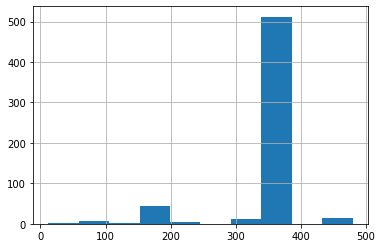

In [55]:
df['Loan_Amount_Term'].hist()

<AxesSubplot:xlabel='Loan_Amount_Term'>

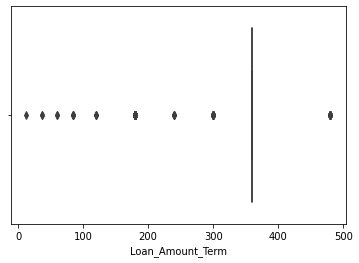

In [56]:
sns.boxplot(x=df['Loan_Amount_Term'])

In [57]:
print("The percentage of NaN values in Loan_Amount_Term:",(df['Loan_Amount_Term'].isnull().sum()/df['Loan_Amount_Term'].isnull().count())*100,"%")

The percentage of NaN values in Loan_Amount_Term: 2.2801302931596092 %


In [58]:
#removal of NaN values
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

<AxesSubplot:xlabel='Loan_Amount_Term'>

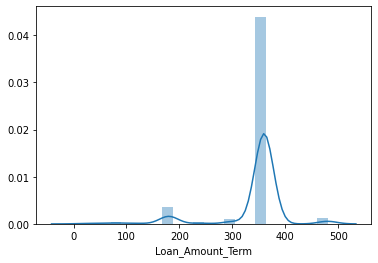

In [59]:
sns.distplot(df['Loan_Amount_Term'])

In [60]:
df['Loan_Amount_Term'].skew()

-2.4021122563890396

In [61]:
df['Loan_Amount_Term_cube'] = np.power(df['Loan_Amount_Term'],3)
print(df['Loan_Amount_Term_cube'].skew())
df.drop('Loan_Amount_Term', axis=1, inplace= True)

0.3578884920624611


<AxesSubplot:xlabel='Loan_Amount_Term_cube'>

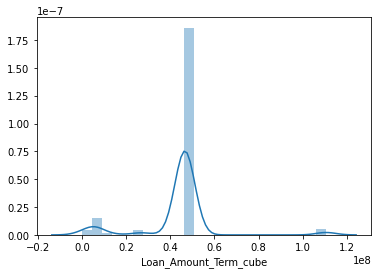

In [62]:
sns.distplot(df['Loan_Amount_Term_cube'])

In [63]:
#Univariate Analysis Of variable 'Property_Area'

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

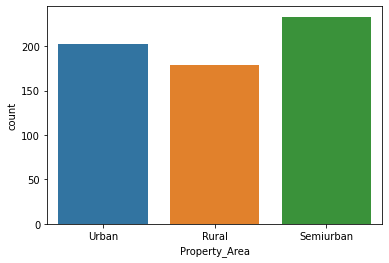

In [64]:
sns.countplot(df['Property_Area'])

In [65]:
print("The percentage of NaN values in Property_Area:",(df['Property_Area'].isnull().sum()/df['Property_Area'].isnull().count())*100,"%")

The percentage of NaN values in Property_Area: 0.0 %


In [66]:
# Bivariate Analysis

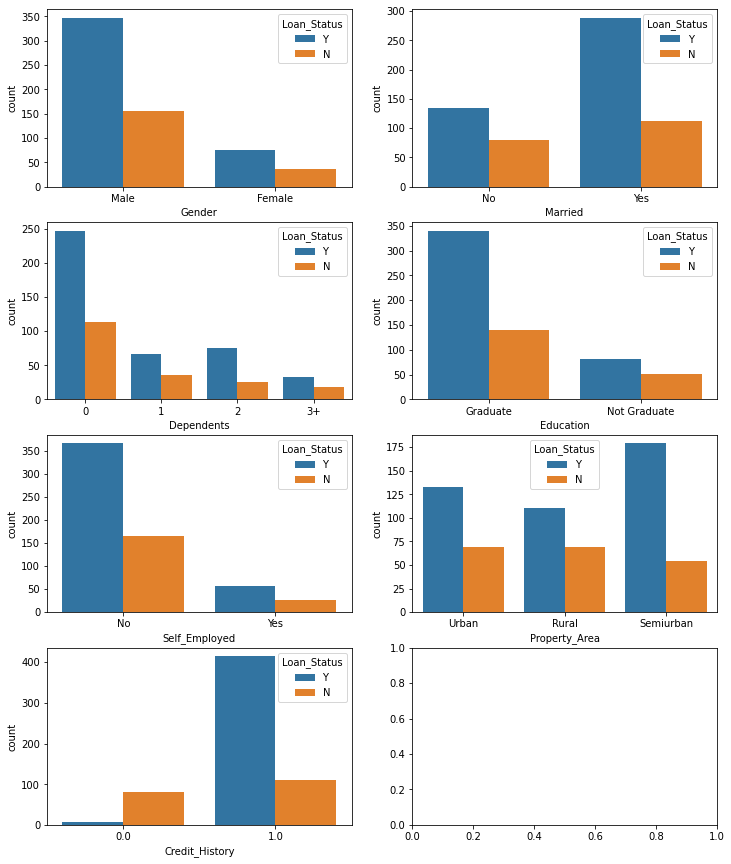

In [67]:
import matplotlib.pyplot as plt

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


In [68]:
print("----Gender column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Gender']=='Male' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of male applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Gender']=='Female' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of female applicants whose loan got passed:",(count/614)*100,"%")

print("----Married column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Married']=='Yes' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Married applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Married']=='No' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of unmarried applicants whose loan got passed:",(count/614)*100,"%")

print("----Dependents column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Dependents']=='0' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of 0 Dependents applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Dependents']=='1' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of 1 Dependents applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Dependents']=='2' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of 2 Dependents applicants whose loan got passed:",(count/614)*100,"%")

print("----Education column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Education']=='Graduate' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Graduate applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Education']=='Not Graduate' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Not Graduate applicants whose loan got passed:",(count/614)*100,"%")

print("----Self_Employed column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Self_Employed']=='Yes' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Self Employed applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Self_Employed']=='No' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of non Self Employed applicants whose loan got passed:",(count/614)*100,"%")

print("----Property_Area column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Property_Area']=='Urban' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Urban applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Property_Area']=='Rural' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Rural applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Property_Area']=='Semiurban' and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Semiurban applicants whose loan got passed:",(count/614)*100,"%")

print("----Credit_History column analysis----")
count =0
for i in range(0,614):
    if df.at[i,'Credit_History']==0.0 and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Credit_History(0.0) applicants whose loan got passed:",(count/614)*100,"%")
count =0
for i in range(0,614):
    if df.at[i,'Credit_History']==1.0 and df.at[i,'Loan_Status']=='Y':
        count+=1
print("The percentage of Credit_History(1.0) applicants whose loan got passed:",(count/614)*100,"%")

----Gender column analysis----
The percentage of male applicants whose loan got passed: 56.51465798045603 %
The percentage of female applicants whose loan got passed: 12.214983713355048 %
----Married column analysis----
The percentage of Married applicants whose loan got passed: 46.90553745928339 %
The percentage of unmarried applicants whose loan got passed: 21.824104234527688 %
----Dependents column analysis----
The percentage of 0 Dependents applicants whose loan got passed: 40.22801302931596 %
The percentage of 1 Dependents applicants whose loan got passed: 10.749185667752444 %
The percentage of 2 Dependents applicants whose loan got passed: 12.37785016286645 %
----Education column analysis----
The percentage of Graduate applicants whose loan got passed: 55.37459283387622 %
The percentage of Not Graduate applicants whose loan got passed: 13.355048859934854 %
----Self_Employed column analysis----
The percentage of Self Employed applicants whose loan got passed: 9.120521172638437 %
T

       TotalIncome_log  LoanAmount_log
count       614.000000      614.000000
mean          8.669414        4.854938
std           0.545102        0.496165
min           7.273786        2.197225
25%           8.334712        4.607658
50%           8.597205        4.828314
75%           8.925549        5.104426
max          11.302204        6.551080


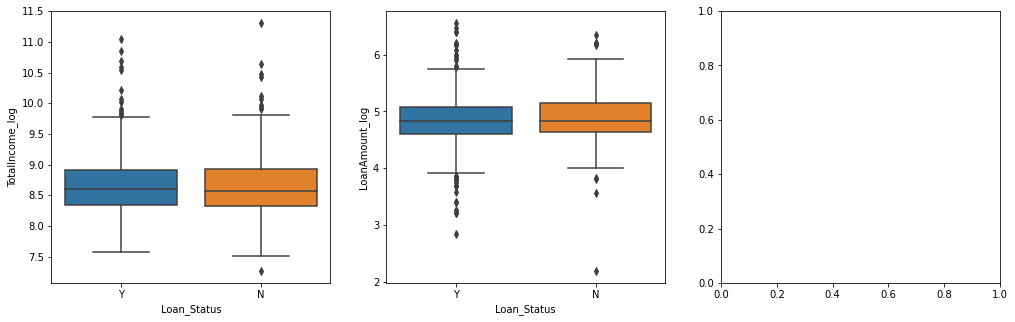

In [69]:
numerical_columns = ['TotalIncome_log', 'LoanAmount_log']
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [70]:
#encoding categorical variables
df = pd.get_dummies(df,drop_first=True)
df.head()

,Credit_History,LoanAmount_log,TotalIncome_log,Loan_Amount_Term_cube,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,4.787492,8.674026,46656000.0,1,0,0,0,0,0,0,0,1,1
1,1.0,4.852030,8.714568,46656000.0,1,1,1,0,0,0,0,0,0,0
2,1.0,4.189655,8.006368,46656000.0,1,1,0,0,0,0,1,0,1,1
3,1.0,4.787492,8.505323,46656000.0,1,1,0,0,0,1,0,0,1,1
4,1.0,4.948760,8.699515,46656000.0,1,0,0,0,0,0,0,0,1,1


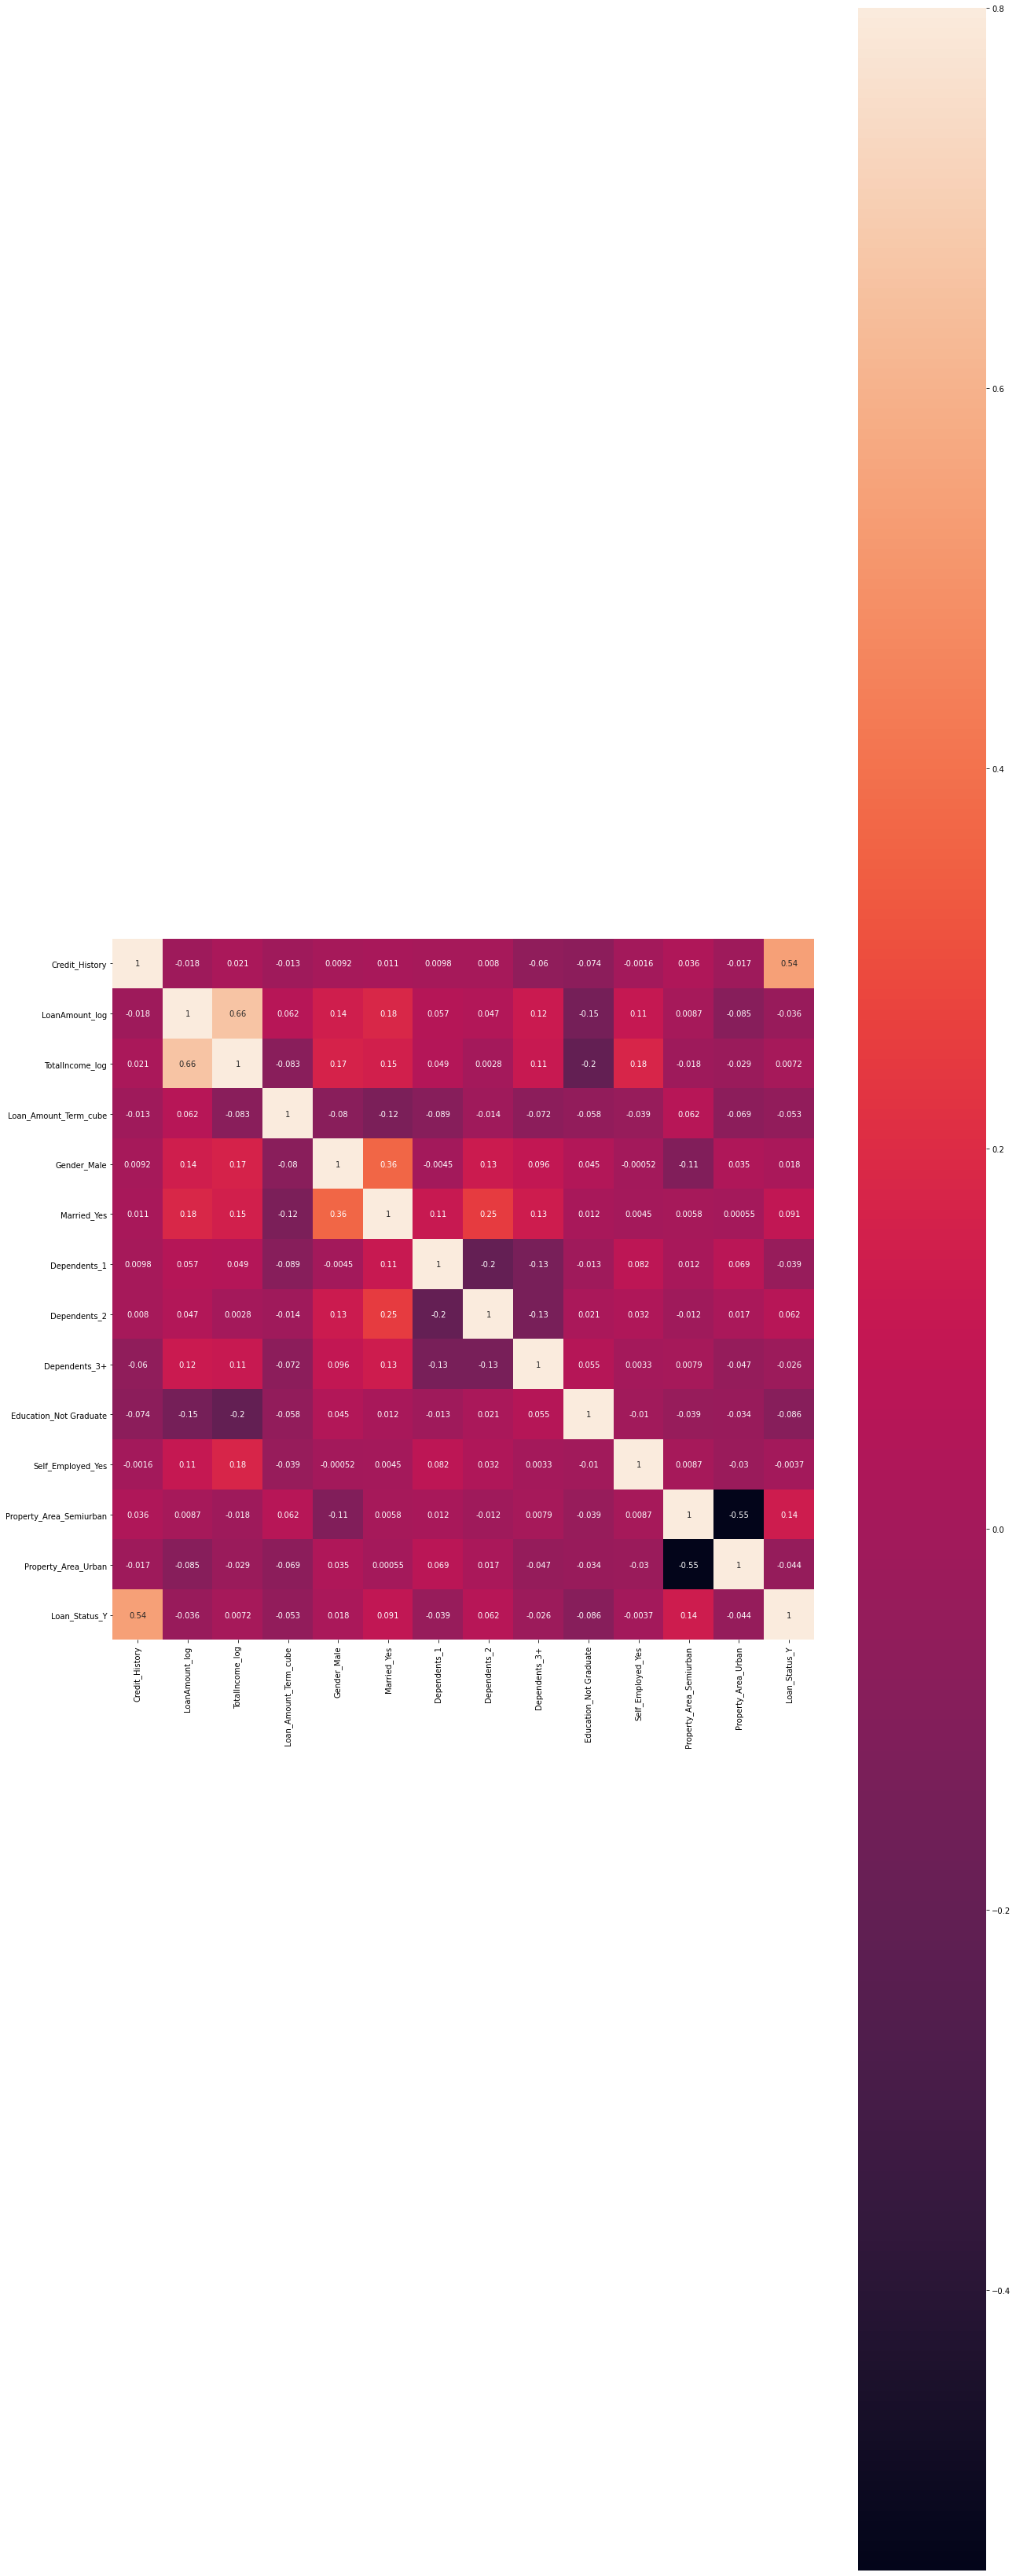

In [71]:
matrix = df.corr() 
ax = plt.subplots(figsize=(20, 60))
sns.heatmap(matrix, vmax=.8, square=True, annot=True);

In [73]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

In [74]:
# Split Features and Target Varible
x = df.drop(columns='Loan_Status_Y')
y = df['Loan_Status_Y']

In [75]:
bestfeatures = SelectKBest(score_func = f_classif,k=3)
fit = bestfeatures.fit(x,y)

In [76]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featurescores = pd.concat([dfcolumns,dfscores],axis = 1)
featurescores.columns = ['Specs','Scores']

In [77]:
print(featurescores)

                      Specs      Scores
0            Credit_History  252.652090
1            LoanAmount_log    0.798578
2           TotalIncome_log    0.032082
3     Loan_Amount_Term_cube    1.741680
4               Gender_Male    0.198059
5               Married_Yes    5.164552
6              Dependents_1    0.919858
7              Dependents_2    2.391030
8             Dependents_3+    0.417923
9    Education_Not Graduate    4.547685
10        Self_Employed_Yes    0.008380
11  Property_Area_Semiurban   11.626448
12      Property_Area_Urban    1.166722


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Loan_Status_Y',axis=1),df['Loan_Status_Y'],test_size=.2,random_state=1)

X_train.shape,X_test.shape

((491, 13), (123, 13))

In [79]:
def correlation(dataset,threshold):
    col_corr=set() 
    corr_matrix=dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: 
                colName=corr_matrix.columns[i] 
                col_corr.add(colName)
    return col_corr
col=correlation(X_train,0.8)
print('Correlated columns:',col)    
    

Correlated columns: set()


In [80]:
X_train.drop(columns=col,axis=1,inplace=True)
X_test.drop(columns=col,axis=1,inplace=True)
#lets check the shape of training set and test set.
X_train.shape,X_test.shape

((491, 13), (123, 13))

In [81]:
X_train.isnull().sum().max()

0

In [83]:
#Logistic Regression Model
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
model=sfs(LogisticRegression(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.3s finished

[2021-02-05 18:28:45] Features: 1/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2021-02-05 18:28:46] Features: 2/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-02-05 18:28:46] Features: 3/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2021-02-05 18:28:46] Features: 4/10 -- score: 0

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=10,
                          n_jobs=-1, scoring='r2', verbose=2)

In [84]:
model.k_feature_names_

('Credit_History',
 'LoanAmount_log',
 'TotalIncome_log',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Property_Area_Urban')

In [85]:
X_train_sfs = model.transform(X_train)
X_test_sfs = model.transform(X_test)

In [86]:
logmodel=LogisticRegression()
logmodel.fit(X_train_sfs, y_train)
y_pred = logmodel.predict(X_test_sfs)

In [87]:
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy:' , (acc * 100))

Test set accuracy: 80.48780487804879


In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8048780487804879

In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("classification_error:",classification_error)

sensitivity = TP / float(FN + TP)

print("sensitivity:",sensitivity)

specificity = TN / (TN + FP)
print("specificity:",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate:",false_positive_rate)

[[16 23]
 [ 1 83]]
classification_error: 0.1951219512195122
sensitivity: 0.9880952380952381
specificity: 0.41025641025641024
false_positive_rate: 0.5897435897435898


In [90]:
#Decision Tree Model
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.tree import DecisionTreeClassifier
model=sfs(DecisionTreeClassifier(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.4s finished

[2021-02-05 18:28:57] Features: 1/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2021-02-05 18:28:57] Features: 2/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-02-05 18:28:58] Features: 3/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-02-05 18:28:58] Features: 4/10 -- score: 0

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=10,
                          n_jobs=-1, scoring='r2', verbose=2)

In [91]:
X_train_sfs = model.transform(X_train)
X_test_sfs = model.transform(X_test)

logmodel=DecisionTreeClassifier()
logmodel.fit(X_train_sfs, y_train)
y_pred = logmodel.predict(X_test_sfs)

In [92]:
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy:' , (acc * 100))

Test set accuracy: 77.23577235772358


In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7723577235772358

In [94]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("classification_error:",classification_error)

sensitivity = TP / float(FN + TP)

print("sensitivity:",sensitivity)

specificity = TN / (TN + FP)
print("specificity:",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate:",false_positive_rate)

[[17 22]
 [ 6 78]]
classification_error: 0.22764227642276422
sensitivity: 0.9285714285714286
specificity: 0.4358974358974359
false_positive_rate: 0.5641025641025641


In [95]:
#knn Model
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
model=sfs(KNeighborsClassifier(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2021-02-05 18:29:04] Features: 1/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-02-05 18:29:04] Features: 2/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-02-05 18:29:05] Features: 3/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2021-02-05 18:29:05] Features: 4/10 -- score: 0

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=10,
                          n_jobs=-1, scoring='r2', verbose=2)

In [96]:
X_train_sfs = model.transform(X_train)
X_test_sfs = model.transform(X_test)

logmodel=KNeighborsClassifier()
logmodel.fit(X_train_sfs, y_train)
y_pred = logmodel.predict(X_test_sfs)

In [97]:
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy:' , (acc * 100))

Test set accuracy: 79.67479674796748


In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7967479674796748

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("classification_error:",classification_error)

sensitivity = TP / float(FN + TP)

print("sensitivity:",sensitivity)

specificity = TN / (TN + FP)
print("specificity:",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate:",false_positive_rate)

[[16 23]
 [ 2 82]]
classification_error: 0.2032520325203252
sensitivity: 0.9761904761904762
specificity: 0.41025641025641024
false_positive_rate: 0.5897435897435898


In [100]:
#Naive Bayes Model
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.naive_bayes import GaussianNB
model=sfs(GaussianNB(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-02-05 18:29:11] Features: 1/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2021-02-05 18:29:11] Features: 2/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-02-05 18:29:11] Features: 3/10 -- score: 0.11719221728171285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-02-05 18:29:11] Features: 4/10 -- score: 0

SequentialFeatureSelector(estimator=GaussianNB(), k_features=10, n_jobs=-1,
                          scoring='r2', verbose=2)

In [101]:
X_train_sfs = model.transform(X_train)
X_test_sfs = model.transform(X_test)

logmodel=GaussianNB()
logmodel.fit(X_train_sfs, y_train)
y_pred = logmodel.predict(X_test_sfs)

In [102]:
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy:' , (acc * 100))

Test set accuracy: 80.48780487804879


In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print("classification_error:",classification_error)

sensitivity = TP / float(FN + TP)

print("sensitivity:",sensitivity)

specificity = TN / (TN + FP)
print("specificity:",specificity)

false_positive_rate = FP / float(TN + FP)

print("false_positive_rate:",false_positive_rate)

[[16 23]
 [ 1 83]]
classification_error: 0.1951219512195122
sensitivity: 0.9880952380952381
specificity: 0.41025641025641024
false_positive_rate: 0.5897435897435898
